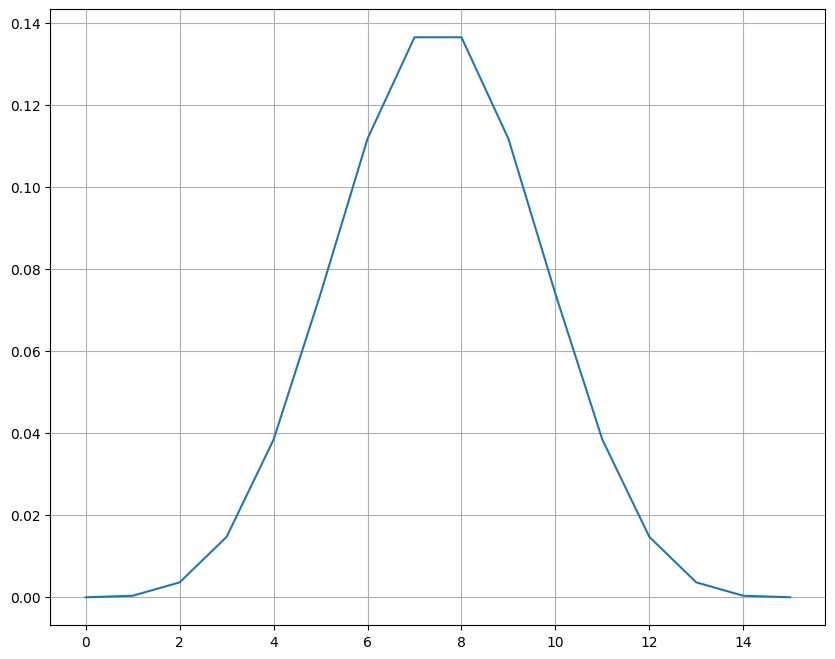

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(16);
h=np.sin(0.14*np.pi*(n-7.5))/(np.pi*(n-7.5));
hk=np.kaiser(16,8);
hfilt=hk*h

plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()


Source code di atas adalah  pembuatan filter dengan menggunakan pendekatan jendela. Pertama, array n dibuat dengan batas dari 0 hingga 15. Kemudian, sebuah filter FIR (Finite Impulse Response) didefinisikan sebagai sinus  yang di-normalisasi dengan nilai 0.14*pi dan dimodifikasi dengan menggunakan fungsi Kaiser window. Fungsi np.kaiser digunakan untuk membuat window Kaiser dengan panjang 16 dan faktor bentuk 8. Hasil dari perkalian antara filter FIR awal (h) dan Kaiser window (hk) disimpan dalam array hfilt. Selanjutnya, menggunakan matplotlib, filter yang telah dibentuk (hfilt) ditampilkan dalam bentuk plot. Dengan demikian, kode tersebut memperlihatkan proses pembentukan filter FIR menggunakan windowing dengan Kaiser window.

In [ ]:
import scipy.signal as signal

def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

Source code di atas menggunakan fungsi freqz(x) untuk menampilkan magnitude dan fase respons filter FIR dalam domain frekuensi. Fungsi signal.freqz(x) dari library scipy.signal digunakan untuk mendapatkan respons frekuensi filter FIR x. Selanjutnya, frekuensi dan magnitudonya dihitung, di mana magnitudenya diubah menjadi skala desibel dan diplot dalam subplot pertama bersama dengan sumbu x yang dinormalisasi menjadi rentang [0, π]. Subplot kedua menampilkan respons fase dalam derajat, di mana fase respons filter diproses untuk dihasilkan dalam derajat dan diplot dalam rentang [0, π].

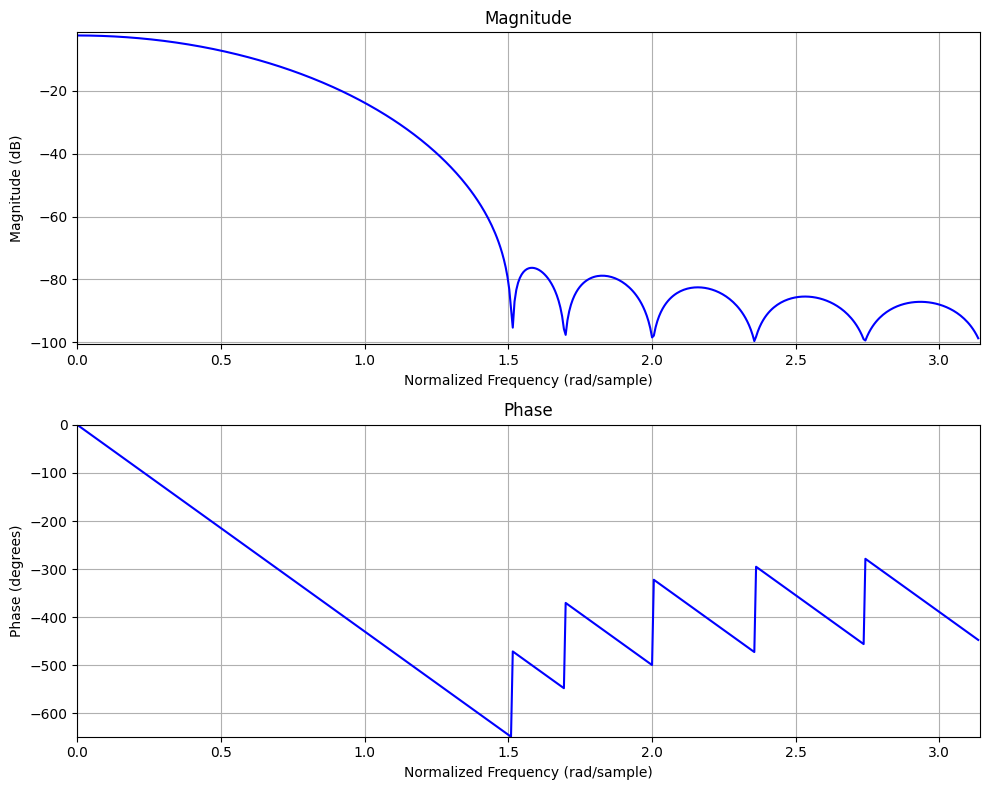

In [ ]:
freqz(hfilt)

Memvisualisasikan magnitude dan fase respons dalam domain frekuensi dari filter FIR yang didefinisikan oleh array hfilt.







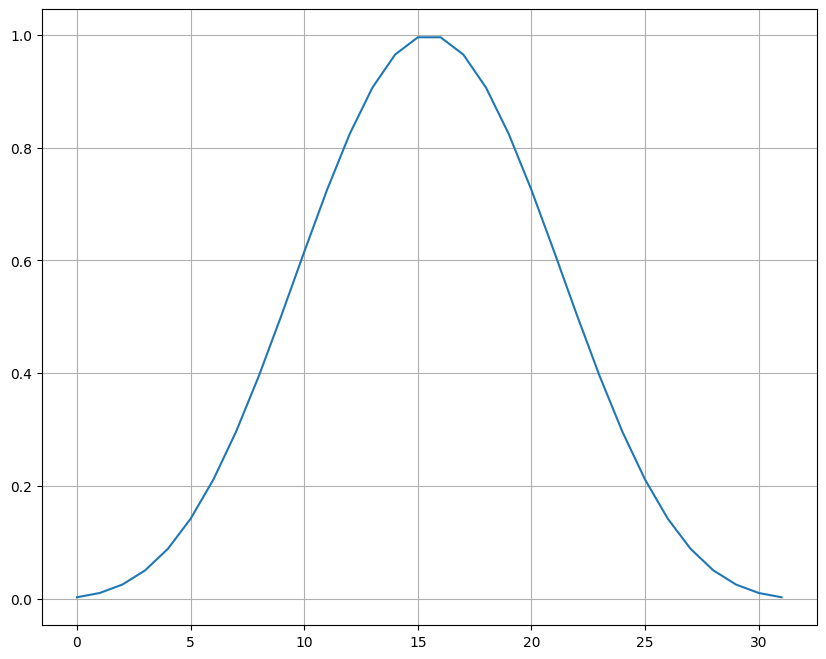

In [ ]:
hk=np.kaiser(32,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()


Source code di atas menghasilkan sebuah jendela Kaiser dengan panjang 32 dan faktor beta sebesar 8, yang direpresentasikan oleh array hk. Jendela Kaiser digunakan dalam proses desain filter FIR untuk menghasilkan respons frekuensi yang lebih tajam dengan mengurangi efek gelombang sisi. Kemudian, jendela tersebut divisualisasikan menggunakan plt.plot(hk).

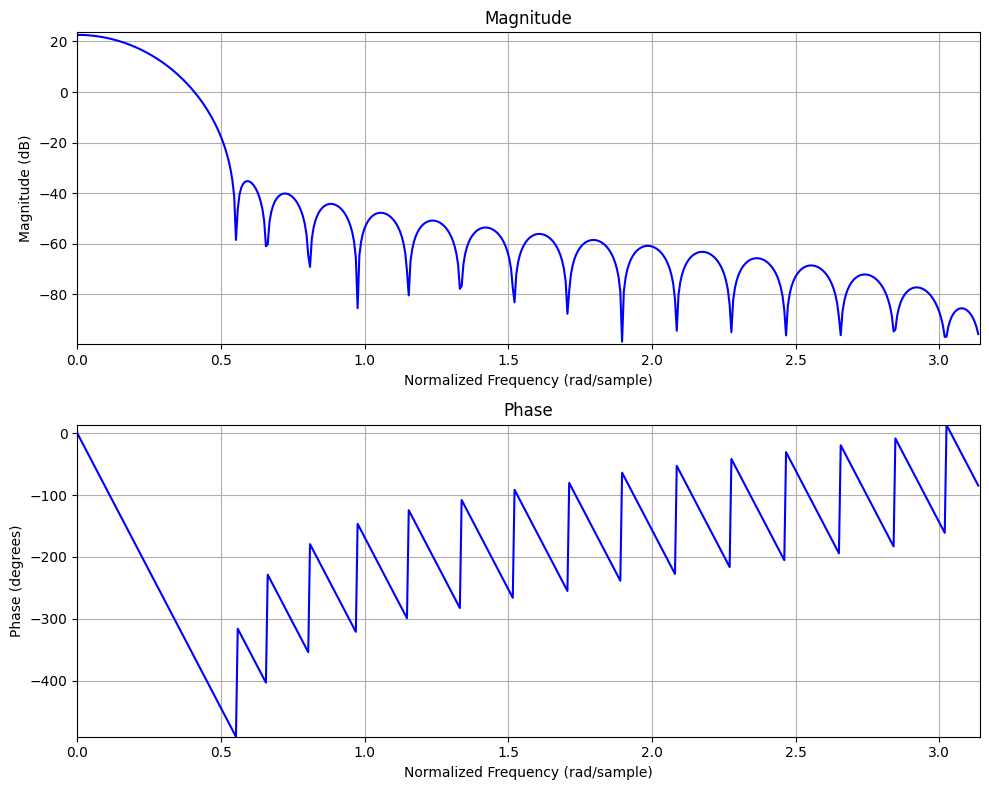

In [ ]:
freqz(hk)

Memvisualisasikan respons frekuensi dari filter FIR yang diperoleh dengan menggunakan jendela Kaiser hk.


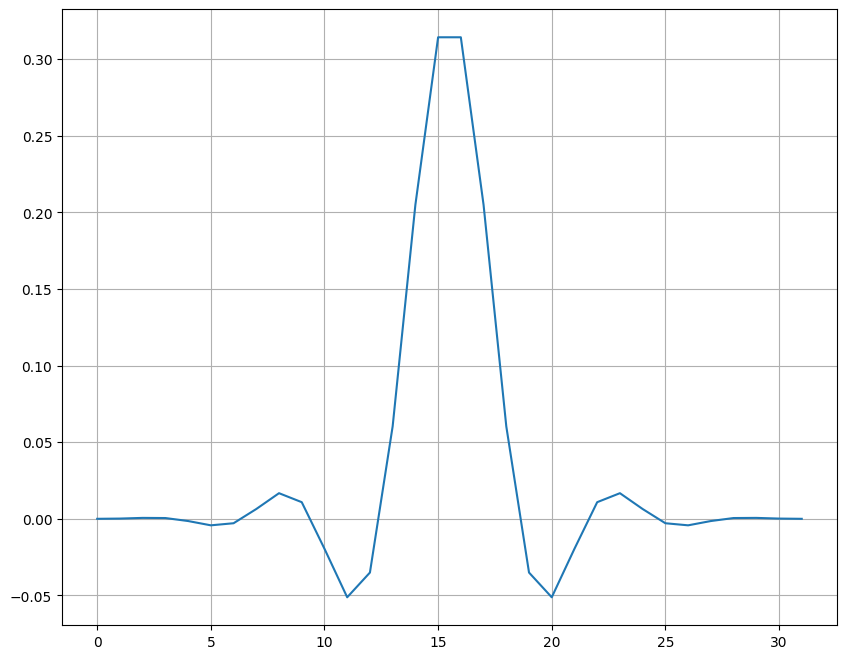

In [ ]:
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8);
#multiply ideal filter and Kaiser window:
hfilt=hk*h;
plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Source code diatas menghasilkan respons impuls ideal dengan menggunakan fungsi sinusoidal dan jendela Kaiser. Array n digunakan untuk membuat urutan bilangan dari 0 hingga 31. Kemudian, fungsi sinusoidal digunakan untuk membuat respons impuls ideal h dengan menggunakan nilai n dan membaginya dengan nilai pi dikalikan dengan selisih n dengan 15.5. Selanjutnya, jendela Kaiser dengan panjang 32 dan faktor β sebesar 8 dibuat menggunakan np.kaiser(32,8) dan disimpan dalam variabel hk. Respons impuls filter FIR sebenarnya, hfilt, dihasilkan dengan mengalikan respons impuls ideal h dengan jendela Kaiser hk.


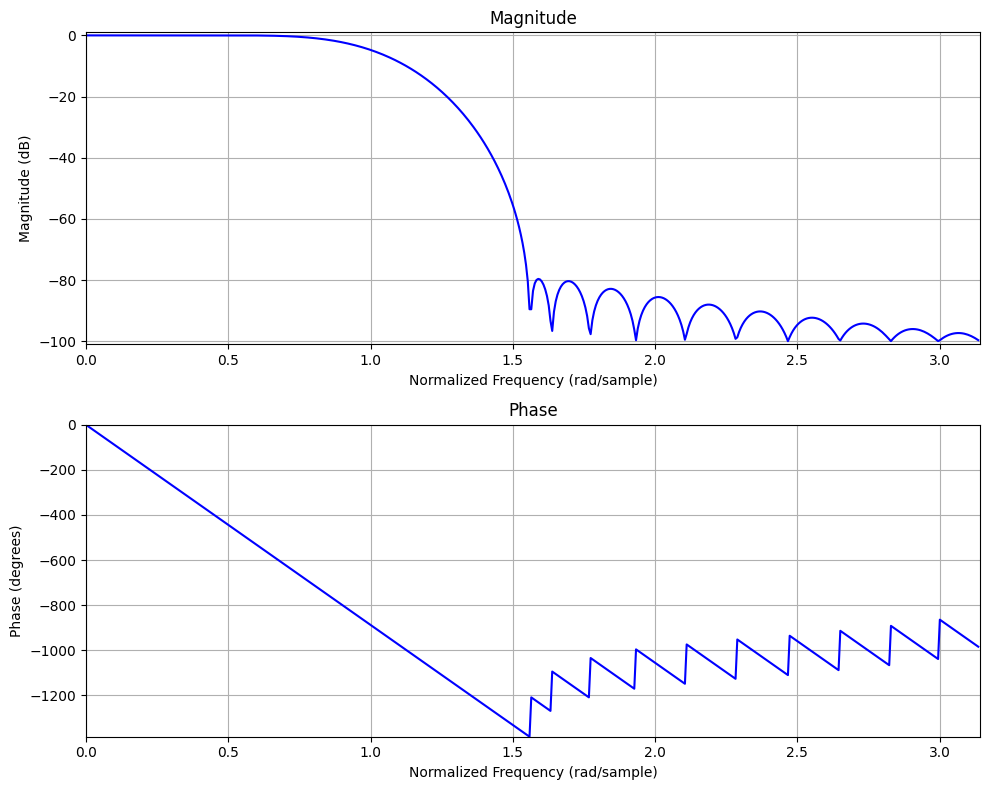

In [ ]:
freqz(hfilt)

Menampilkan respons frekuensi dari sinyal hfilt yang telah diperoleh sebelumnya dengan mengalikan respons impuls ideal dengan jendela Kaiser.

In [2]:
"""
PyAudio Example: Mix speech with a 1 kHz carrier (i.e., record a
few samples, mix/modulate them with a sine wave, and play them back immediately).
Using block-wise processing
Gerald Schuller, Octtober 2014

--- Modified by Renato Profeta to include GUI, April 2020
"""

# Imports
import pyaudio
import struct
import numpy
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading

# Parameters
CHUNK = 5000 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 32000  #Sampling Rate in Hz
RECORD_SECONDS = 8

def audio_app(toogle_run):
    while(True):
        if toggle_run.value==True:
            break

        #Reading from audio input stream into data with block length "CHUNK":
        data = (stream.read(CHUNK))
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK, data))
        samples=(list(shorts))

        #start block-wise signal processing:

        #Compute a block/an array of sine samples with 500 Hz:
        s=numpy.sin(2*numpy.pi/RATE*500*numpy.arange(0,CHUNK));
        #multiply/modulate the signal with the sine samples:
        samples=samples*s;
        samples=(numpy.clip(samples, -32000,32000)).astype(int)
        #end signal processing

        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream:
        stream.write(data, CHUNK)

# GUI
toggle_run = ToggleButton(description='Stop')
button_start = Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
        toggle_run.disabled=True
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=audio_app, args=(toggle_run,))

# Start Audio Stream
# Create
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                #input_device_index=10,
                frames_per_buffer=CHUNK)

display(box_buttons)
HBox(children=(Button(description='Start', style=ButtonStyle()))), ToggleButton(value=False, description='Stop')

ModuleNotFoundError: No module named 'pyaudio'


Source code diatas sebuah contoh penggunaan PyAudio untuk merekam suara dari input audio, memodulasikannya dengan gelombang sinus 1 kHz, dan memainkannya kembali melalui output audio secara langsung menggunakan pemrosesan berbasis blok. Dalam aplikasi ini, terdapat GUI yang menggunakan library ipywidgets untuk memulai dan menghentikan proses. Saat tombol "Start" ditekan, aplikasi memulai proses pemrosesan audio dalam sebuah thread terpisah, yang berhenti ketika tombol "Stop" ditekan. Proses audio mencakup membaca data dari stream input, memodulasinya dengan gelombang sinus, dan menulis data yang diproses ke stream output. Namun dalam kesempatan kali ini, kode tidak dapat berjalan karena adanya error pada library 'pyaudio' dan sampel suara

In [21]:
import numpy as np
from scipy.signal import freqz

n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8)
#multiply ideal filter and Kaiser window:
hfilt=hk*h

Source code diatas merupakan salah satu contoh untuk mendesain filter FIR (Finite Impulse Response). Pertama, sebuah array n dibuat dengan panjang 32, yang digunakan sebagai indeks dalam menghitung respon impuls dari filter. Kemudian, dibuat respons impuls ideal h dengan menggunakan fungsi sinusoidal. Selanjutnya, sebuah jendela Kaiser dengan panjang 32 dan faktor penghalus 8 diciptakan menggunakan np.kaiser(32, 8), disimpan dalam variabel hk. Terakhir, respon impuls filter FIR dihasilkan dengan mengalikan respons impuls ideal (h) dengan jendela Kaiser (hk), dan disimpan dalam variabel hfilt.

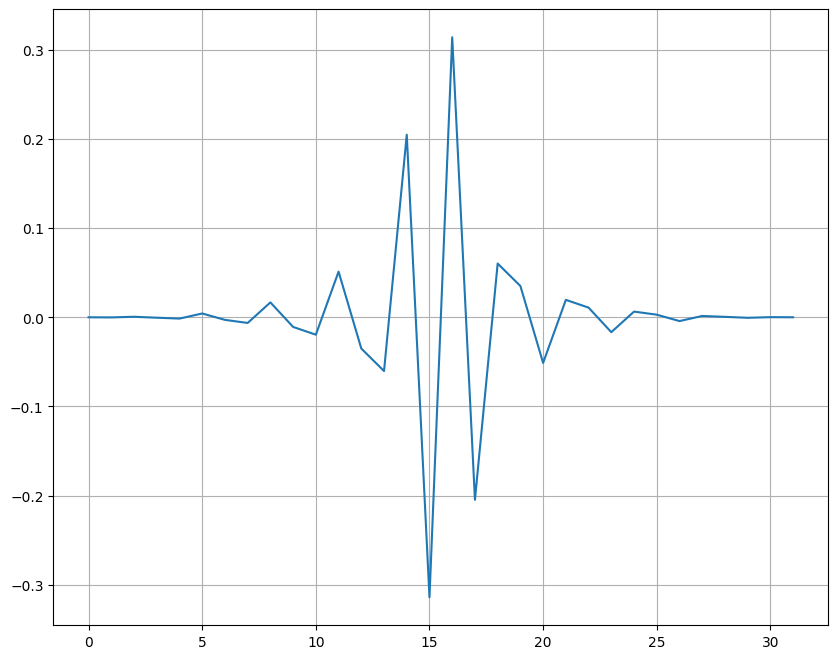

In [22]:
import matplotlib.pyplot as plt

hp=hfilt*np.cos(np.pi *np.arange(32))

plt.figure(figsize=(10,8))
plt.plot(hp)
plt.grid()

Code diatas adalah hasil dari perkalian titik demi titik antara respons impuls filter FIR yang telah dibuat sebelumnya (hfilt) dengan fungsi kosinus. Proses perkalian tersebut dilakukan dengan mengalikan setiap elemen dari hfilt dengan kosinus dari angka-angka berurutan dari 0 hingga 31, dikalikan dengan nilai π. Hasilnya, sebuah sinyal baru disimpan dalam variabel hp. Sinyal tersebut divisualisasikan dalam bentuk plot.

In [25]:
freqz(hp)

(array([0.        , 0.00613592, 0.01227185, 0.01840777, 0.02454369,
        0.03067962, 0.03681554, 0.04295146, 0.04908739, 0.05522331,
        0.06135923, 0.06749515, 0.07363108, 0.079767  , 0.08590292,
        0.09203885, 0.09817477, 0.10431069, 0.11044662, 0.11658254,
        0.12271846, 0.12885439, 0.13499031, 0.14112623, 0.14726216,
        0.15339808, 0.159534  , 0.16566993, 0.17180585, 0.17794177,
        0.18407769, 0.19021362, 0.19634954, 0.20248546, 0.20862139,
        0.21475731, 0.22089323, 0.22702916, 0.23316508, 0.239301  ,
        0.24543693, 0.25157285, 0.25770877, 0.2638447 , 0.26998062,
        0.27611654, 0.28225246, 0.28838839, 0.29452431, 0.30066023,
        0.30679616, 0.31293208, 0.319068  , 0.32520393, 0.33133985,
        0.33747577, 0.3436117 , 0.34974762, 0.35588354, 0.36201947,
        0.36815539, 0.37429131, 0.38042724, 0.38656316, 0.39269908,
        0.398835  , 0.40497093, 0.41110685, 0.41724277, 0.4233787 ,
        0.42951462, 0.43565054, 0.44178647, 0.44

Menghitung respons frekuensi dari sinyal hasil perkalian hp dengan fungsi kosinus. Namun, perintah freqz(hp) tidak bisa berfungsi dengan benar karena freqz biasanya digunakan untuk menghitung respons frekuensi dari filter FIR atau IIR, bukan sinyal seperti yang dihasilkan dalam hp. Sehingga output yang dihasilkan bukan sebuah plot seperti kode sebelumnya

In [15]:
hbp=hfilt*np.cos(np.pi/2 *np.arange(32))
freqz(hbp)

(array([0.        , 0.00613592, 0.01227185, 0.01840777, 0.02454369,
        0.03067962, 0.03681554, 0.04295146, 0.04908739, 0.05522331,
        0.06135923, 0.06749515, 0.07363108, 0.079767  , 0.08590292,
        0.09203885, 0.09817477, 0.10431069, 0.11044662, 0.11658254,
        0.12271846, 0.12885439, 0.13499031, 0.14112623, 0.14726216,
        0.15339808, 0.159534  , 0.16566993, 0.17180585, 0.17794177,
        0.18407769, 0.19021362, 0.19634954, 0.20248546, 0.20862139,
        0.21475731, 0.22089323, 0.22702916, 0.23316508, 0.239301  ,
        0.24543693, 0.25157285, 0.25770877, 0.2638447 , 0.26998062,
        0.27611654, 0.28225246, 0.28838839, 0.29452431, 0.30066023,
        0.30679616, 0.31293208, 0.319068  , 0.32520393, 0.33133985,
        0.33747577, 0.3436117 , 0.34974762, 0.35588354, 0.36201947,
        0.36815539, 0.37429131, 0.38042724, 0.38656316, 0.39269908,
        0.398835  , 0.40497093, 0.41110685, 0.41724277, 0.4233787 ,
        0.42951462, 0.43565054, 0.44178647, 0.44


code tersebut mengalikan respons filter FIR yang telah difilter dengan hfilt dengan gelombang kosinus yang memiliki frekuensi setengah dari frekuensi Nyquist. Fungsi freqz kemudian digunakan untuk menghitung dan memplot respons frekuensi dari filter FIR hasil perkalian tersebut. Namun output yang keluar mirip dengan code sebelumnya